In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import os
import h5py
from datetime import datetime, timedelta

import numpy as np

import matplotlib.pyplot as plt
import os
import h5py 
from tqdm import tqdm
from PIL import Image


In [2]:
TRAIN_TEST_SPLIT = 0.85
THRESHOLD = 3.0
data_dir = "/home/C00535626/meteonet/reflectivity_old"

all_dirs = sorted(os.listdir(data_dir))

train_dirs = all_dirs[:int(len(all_dirs)*TRAIN_TEST_SPLIT)]
test_dirs = all_dirs[int(len(all_dirs)*TRAIN_TEST_SPLIT):]
print(len(train_dirs), len(test_dirs))

28 6


  0%|          | 0/1 [00:00<?, ?it/s]

/home/C00535626/meteonet/reflectivity_old/reflectivity-old-NW-2016-01/reflectivity_old_NW_2016_01.2.npz
(2879, 565, 784)
Original Data:
Min value: 0
Max value: 255
Mean value: 35.91162922307433
Data type: int16


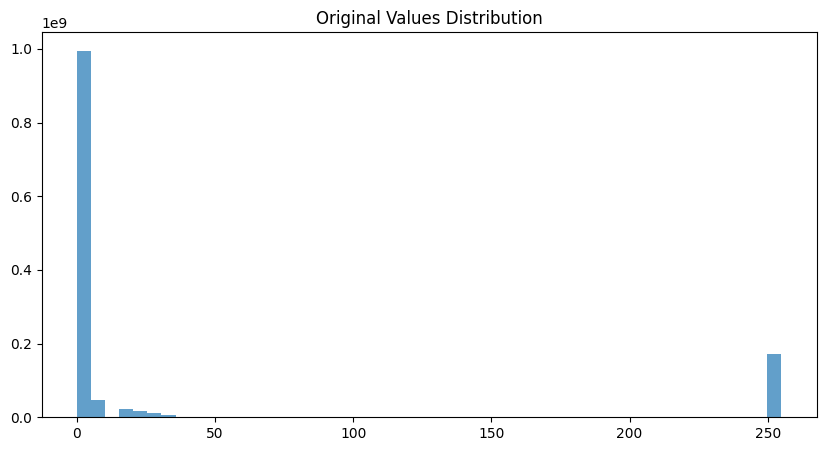

100%|██████████| 1/1 [00:18<00:00, 18.75s/it]


In [3]:

for dir in tqdm(train_dirs[:1]): # tqdm adds progress bar
    img_paths = os.listdir(os.path.join(data_dir,dir))
    long_seq = []

    for path in sorted(img_paths[:1]):
        img_path = os.path.join(data_dir, dir, path)
        print(img_path)
        d = np.load(img_path, allow_pickle=True)
        data = d['data']
        print(data.shape)
        
        # Original data statistics
        print("Original Data:")
        print(f"Min value: {data.min()}")
        print(f"Max value: {data.max()}")
        print(f"Mean value: {data.mean()}")
        print(f"Data type: {data.dtype}")

        %matplotlib inline
        # Examine distribution
        plt.figure(figsize=(10,5))
        plt.hist(data.flatten(), bins=50, alpha=0.7)
        plt.title("Original Values Distribution")
        plt.show()
        
        # for x in data:
        #     # print(x.shape)
        #     image = Image.fromarray(x.astype(np.uint8))
        #     grayscale_image = image.convert('L')
        #     image_array = np.array(grayscale_image)
        #     long_seq.append(image_array) # make it a dict or tuple with date   


Frame 0:
Original range: 0.00e+00 to 2.55e+02
Pixel range: 0 to 255


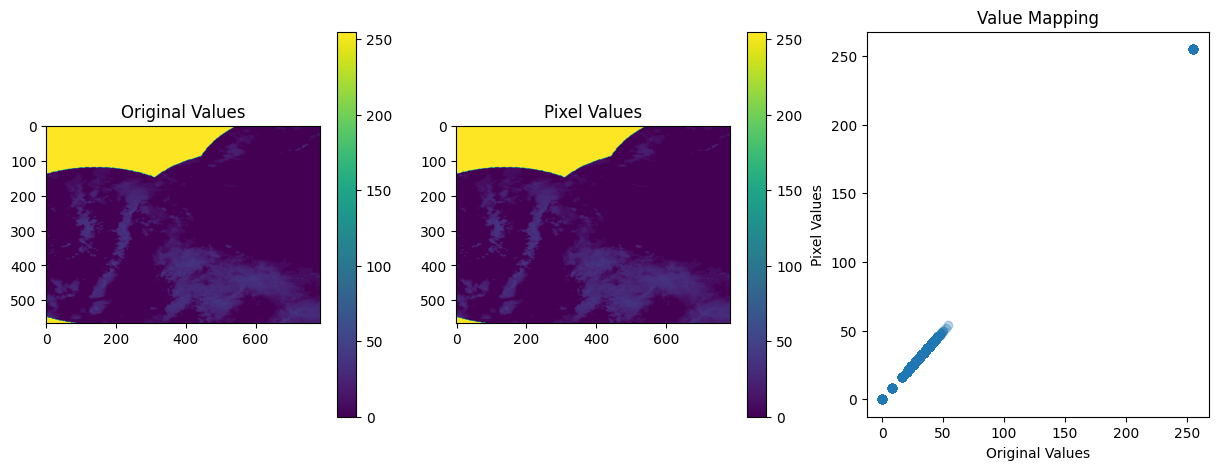


Frame 1:
Original range: 0.00e+00 to 2.55e+02
Pixel range: 0 to 255


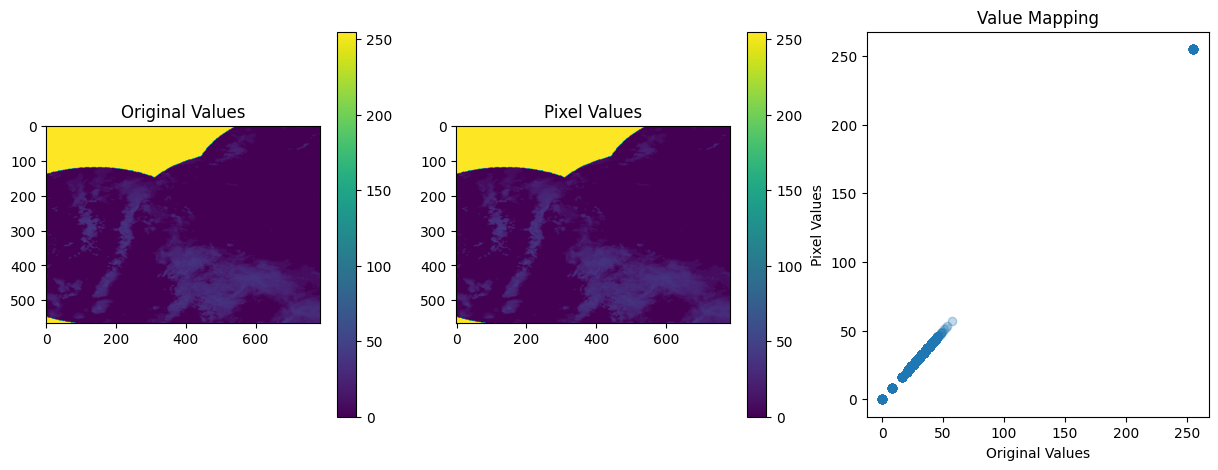


Frame 2:
Original range: 0.00e+00 to 2.55e+02
Pixel range: 0 to 255


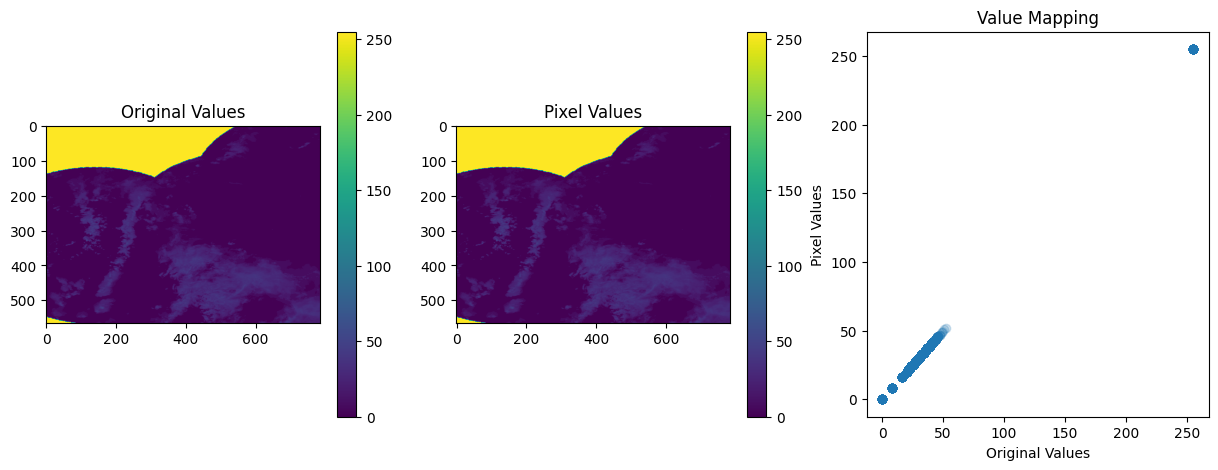

In [4]:
# Sample a few frames to analyze conversion
%matplotlib inline
for i in range(3):  # look at first 3 frames
    original = data[i,:,:]
    pixel_img = Image.fromarray(original.astype(np.uint8))
    pixel_array = np.array(pixel_img)
    
    print(f"\nFrame {i}:")
    print(f"Original range: {original.min():.2e} to {original.max():.2e}")
    print(f"Pixel range: {pixel_array.min()} to {pixel_array.max()}")
    
    # Plot original vs pixel values
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.imshow(original)
    plt.title("Original Values")
    plt.colorbar()
    
    plt.subplot(132)
    plt.imshow(pixel_array)
    plt.title("Pixel Values")
    plt.colorbar()
    
    plt.subplot(133)
    plt.scatter(original.flatten(), pixel_array.flatten(), alpha=0.1)
    plt.xlabel("Original Values")
    plt.ylabel("Pixel Values")
    plt.title("Value Mapping")
    plt.show()

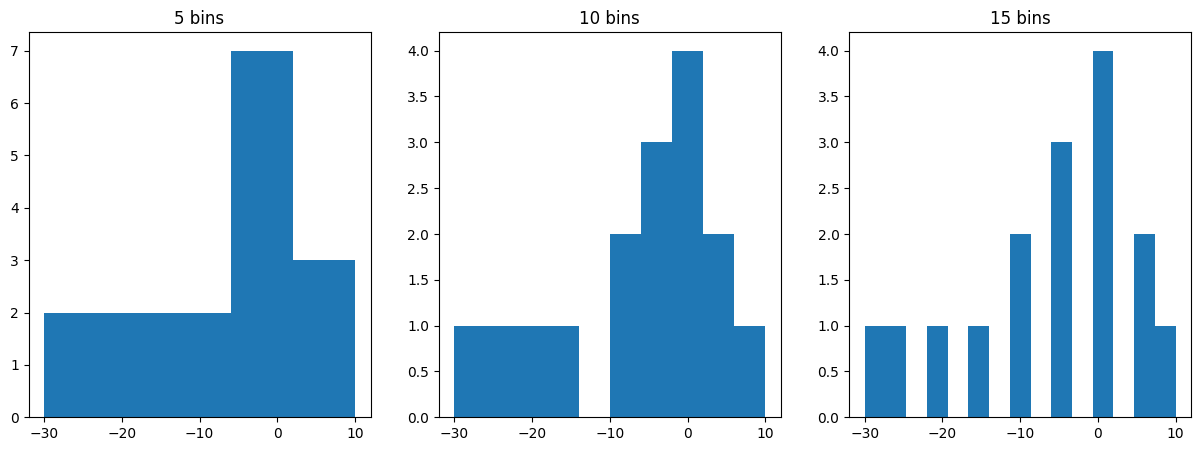

In [16]:
# Let's say your data has these values:
data = [-30, -25, -20, -15, -10, -10, -5, -5, -5, 0, 0, 0, 0, 5, 5, 10]

plt.figure(figsize=(15,5))

# With few bins (5)
plt.subplot(131)
plt.hist(data, bins=5)
plt.title("5 bins")

# With more bins (10)
plt.subplot(132)
plt.hist(data, bins=10)
plt.title("10 bins")

# With many bins (15)
plt.subplot(133)
plt.hist(data, bins=15)
plt.title("15 bins")

plt.show()